# MACHINE LEARNING ZOOMCAMP - COHORT 2024

## HOMEWORK 2 - Regression
### Angole Daniel
Note: sometimes your answer doesn't match one of the options exactly. That's fine. Select the option that's closest to your solution.

## Dataset
In this homework, we will use the Laptops price dataset from Kaggle.

Here's a wget-able link:

wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

The goal of this homework is to create a regression model for predicting the prices (column 'Final Price').


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Preparing the dataset
First, we'll normalize the names of the columns:

df.columns = df.columns.str.lower().str.replace(' ', '_')

In [2]:
df = pd.read_csv('laptops.csv')
df

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head(2)

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.0
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.0


Now, instead of 'Final Price', we have 'final_price'.

Next, use only the following columns:

- 'ram',
- 'storage',
- 'screen',
- 'final_price'

In [4]:
selected_columns = ['ram', 'storage', 'screen', 'final_price']
df_select = df[selected_columns]
df_select.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


### EDA
Look at the final_price variable. Does it have a long tail?

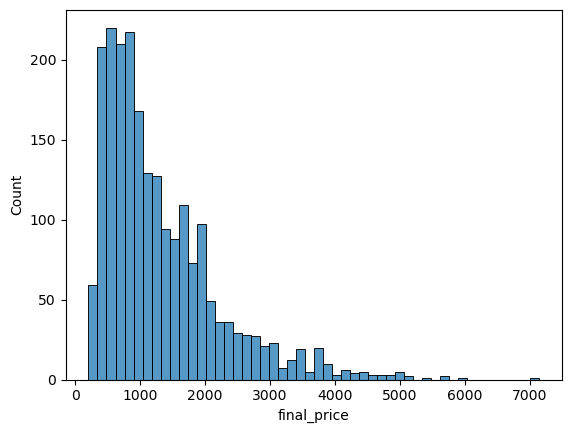

In [5]:
sns.histplot(df.final_price, bins=50)
plt.show()

#### Yes it has a tail

### Question 1. There's one column with missing values. What is it?


In [6]:
df_select.isna().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

##### Q1. Ans: The column 'screen' has missing values

### Question 2. 
What's the median (50% percentile) for variable 'ram'?

In [7]:
df_select.ram.median()

16.0

##### Q2. Ans: The column median (50% percentile) for variable 'ram' is 16.0

### Prepare and split the dataset
- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
Use the same code as in the lectures

In [8]:
n = len(df_select)
# Split data in train/val/test sets, with 60%/20%/20%
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [9]:
# Number of records in each set
n_val, n_test, n_train

(432, 432, 1296)

In [10]:
# Checking that the sum of records from all the sets amounts to the original number of records
n_val + n_test + n_train

2160

In [11]:
# Data shuffle with seed 42
np.random.seed(42)
idx = np.arange(n)
np.random.shuffle(idx)

In [12]:
df_train = df_select.iloc[idx[:n_train]]
df_val = df_select.iloc[idx[n_train:n_train+n_val]]
df_test = df_select.iloc[idx[n_train+n_val:]]

In [13]:
#check 1: Trainning set
df_train.head()

,ram,storage,screen,final_price
2079,32,1000,15.6,1123.29
668,4,64,14.1,201.05
2073,32,1000,14.0,997.74
1113,16,512,13.3,1016.00
788,32,1000,16.0,2739.00


In [14]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [15]:
df_train.head()

,ram,storage,screen,final_price
0,32,1000,15.6,1123.29
1,4,64,14.1,201.05
2,32,1000,14.0,997.74
3,16,512,13.3,1016.00
4,32,1000,16.0,2739.00


In [16]:
y_train = df_train.final_price
y_val = df_val.final_price
y_test = df_test.final_price

In [17]:
#Check
df_train.head()

,ram,storage,screen,final_price
0,32,1000,15.6,1123.29
1,4,64,14.1,201.05
2,32,1000,14.0,997.74
3,16,512,13.3,1016.00
4,32,1000,16.0,2739.00


In [18]:
# checking size of each set
len(df_train), len(df_val), len(df_test)

(1296, 432, 432)

In [19]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']
df_train.head()

,ram,storage,screen
0,32,1000,15.6
1,4,64,14.1
2,32,1000,14.0
3,16,512,13.3
4,32,1000,16.0


### Question 3
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

In [20]:
def train_linear_regression(X, y):
    one = np.ones(X.shape[0])
    X = np.column_stack([one, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [21]:
# Function to fill missing values with 0
def fill_zero(df):
    df = df.fillna(0)
    result = df.values
    return result

# Function to fill missing values the mean of the training data
mean_values = df_train.mean()
screen_mean = mean_values['screen']

def fill_mean(df):
    df = df.fillna(screen_mean)
    X = df.values
    return X

In [22]:
# RMSE Function
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    rmse_error = np.sqrt(mse)
    return rmse_error

### Training linear regression model when missing values were filled with zero

In [23]:
X_train = fill_zero(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = fill_zero(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

597.3635593619621

### Training linear regression model when missing values were filled with mean

In [24]:
X_train = fill_mean(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = fill_mean(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

600.2650313748422

#### Which option gives better RMSE?
Filling with Zeroes gives better results.

### Question 4
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

If there are multiple options, select the smallest r.

In [25]:
# Function for regularized linear regression
def lin_regr_regular(X, y, r):
    one = np.ones(X.shape[0])
    X = np.column_stack([one, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [26]:
for i in [0, 0.01, 0.1, 1, 5, 10, 100]: 
    X_train = fill_zero(df_train)
    w0, w = lin_regr_regular(X_train, y_train, r=i)
    
    X_val = fill_zero(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(f"Regularization:{i}, \t bias:{w0}, \t RMSE:{score:.2f}")

Regularization:0, 	 bias:676.8954853003471, 	 RMSE:597.36
Regularization:0.01, 	 bias:676.2736817204672, 	 RMSE:597.36
Regularization:0.1, 	 bias:670.7284836313021, 	 RMSE:597.35
Regularization:1, 	 bias:619.9030834107807, 	 RMSE:597.21
Regularization:5, 	 bias:463.77716971415225, 	 RMSE:597.01
Regularization:10, 	 bias:352.79713367676436, 	 RMSE:597.06
Regularization:100, 	 bias:66.92071440180734, 	 RMSE:597.90


#### Which r gives the best RMSE:
5.

### Question 5
- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
-What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))
- 
What's the value of std?

In [27]:
score = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(seed)
    
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    df_train = df_select.iloc[idx[:n_train]].reset_index(drop=True)
    df_val = df_select.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
    df_test = df_select.iloc[idx[n_train+n_val:]].reset_index(drop=True)
    
    y_train = df_train.final_price.values
    y_val = df_val.final_price.values
    
    df_train = df_train.drop('final_price', axis=1)
    df_val = df_val.drop('final_price', axis=1)
    
    X_train = fill_zero(df_train)
    w0, w = train_linear_regression(X_train, y_train)

    X_val = fill_zero(df_val)
    y_pred = w0 + X_val.dot(w)
    rmse_val = rmse(y_val, y_pred)
    score.append(rmse_val)


np.std(score).round(3)

29.176

### Question 6
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

In [28]:
np.random.seed(9)

idx = np.arange(n)
np.random.shuffle(idx)
    
df_train = df_select.iloc[idx[:n_train]].reset_index(drop=True)
df_val = df_select.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
df_test = df_select.iloc[idx[n_train+n_val:]].reset_index(drop=True)

final_df = pd.concat([df_train, df_val]).reset_index(drop=True)

y_final = final_df['final_price']
y_test = df_test.final_price.values
    
train_df = final_df.drop('final_price', axis=1)
test_df = df_test.drop('final_price', axis=1)
    
X_train = fill_zero(train_df)
w0, w = lin_regr_regular(X_train, y_final, r=0.001)

X_test = fill_zero(test_df)
y_pred = w0 + X_test.dot(w)
rmse_val = round(rmse(y_test, y_pred), 2)
print(rmse_val)

608.61
